# Wine Data Set - What are the best wines in the world and what describes them
### Earthy? Chocolate? Fruity? Etc.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(color_codes=True)
url = 'https://www.kaggle.com/zynicide/wine-reviews/data'

wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Data Wrangling - Let's clean the dataset before doing EDA

In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In this dataset, there are wineries without countries filled in. Since wineries are not like businesses and they tend to only have one location, let's fill in the missing country data based on where the winery is located.

In [75]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [35]:
# Create a winery to country map to missing misisng country values in DataFrame
country_to_continent_map = {}
for i in zip(wine.country, wine.winery):
    if i[1] not in country_to_continent_map and pd.notnull(i[0]):
        country_to_continent_map[i[1]] = i[0]
country_to_continent_map

wine['country'] = wine.winery.map(country_to_continent_map)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129940 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


After accurately mapping 32 missing country values, there are still countries that are missing from the dataset. Let's drop those values along with any duplicates.

In [36]:
wine = wine.drop_duplicates() # Drop duplicate rows
wine = wine[pd.notnull(wine.country)] # Drop missing country values
wine = wine[pd.notnull(wine.price)]   # Drop missing price values
wine = wine[pd.notnull(wine.variety)] # Drop missing variety values
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111562 entries, 1 to 129970
Data columns (total 13 columns):
country                  111562 non-null object
description              111562 non-null object
designation              79508 non-null object
points                   111562 non-null int64
price                    111562 non-null float64
province                 111537 non-null object
region_1                 93580 non-null object
region_2                 46568 non-null object
taster_name              88290 non-null object
taster_twitter_handle    83807 non-null object
title                    111562 non-null object
variety                  111562 non-null object
winery                   111562 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 11.9+ MB


Now we have a dataset that is clean of missing values and we can work with. Next let's do visual EDA to get familiar with the dataset.

## Visual EDA

In [37]:
df = wine.copy()
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


### What is the top wine producing country?

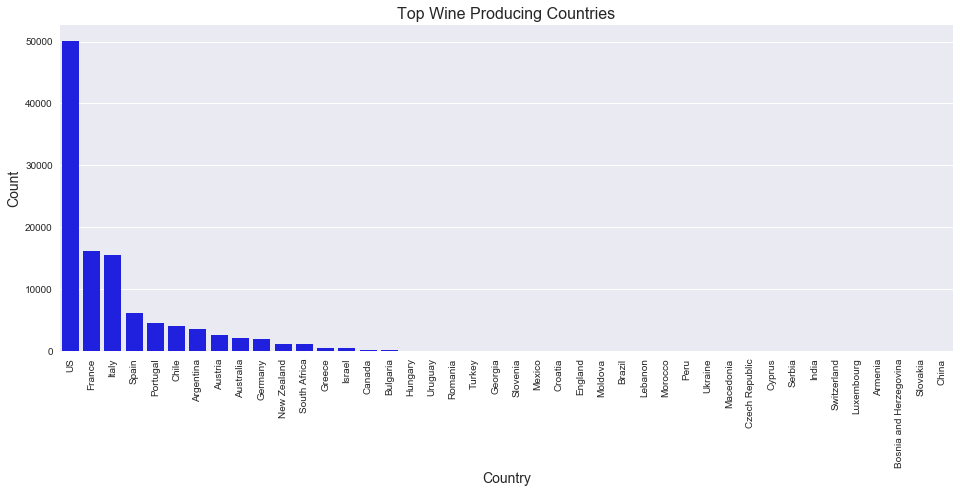

country    FranceItalySpainPortugal
count                         42320
dtype: object

In [38]:
df_temp_country = df.groupby('country', as_index=False)['variety'].count().\
                              sort_values(by='variety', ascending=False)
df_temp_country.columns = ['country', 'count']

fig = plt.figure(figsize=(16, 6))                                            
sns.barplot(x = 'country', y = 'count', color='blue', data=df_temp_country)  
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=90)
plt.title('Top Wine Producing Countries', size=16)
plt.show()

df_temp_country[df_temp_country.country != 'US'].head(4).sum()

### What is the top produced variety?

In [39]:
temp_variety = df.groupby('variety', as_index=False)['winery'].count().\
                          sort_values(by='winery', ascending=False)
temp_variety.columns = ['variety', 'count']
len(temp_variety)

694

There are 694 different varietals in this dataset, some of which with a count of one. Let's chart a graph with at least 200 observations

55


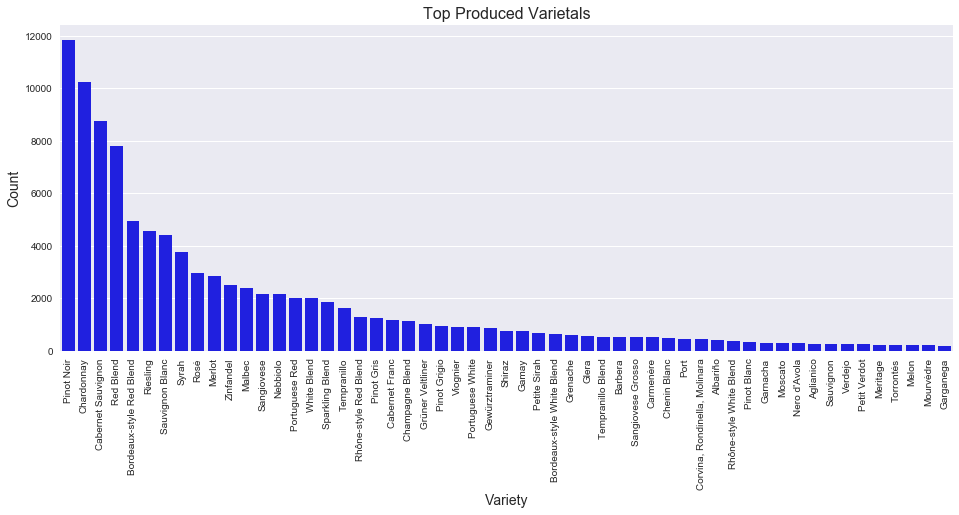

In [40]:
temp_variety_200 = temp_variety[temp_variety['count'] > 200]
print(len(temp_variety_200))

fig = plt.figure(figsize=(16, 6))

sns.barplot(x = 'variety', y = 'count', data=temp_variety_200, color='blue')

plt.xlabel('Variety', size=14)
plt.xticks(rotation=90)
plt.ylabel('Count', size=14)
plt.title('Top Produced Varietals', size=16)
plt.show()

### What is the relationship between price and points?

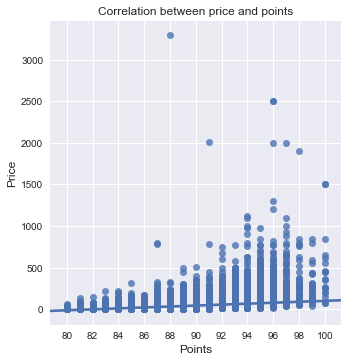

In [41]:
# Plot scatter plot
sns.lmplot(x = 'points', y = 'price', data=df)

plt.xlabel('Points', size=12)
plt.xticks(np.arange(min(df.points), max(df.points)+1, 2))
plt.ylabel('Price', size=12)
plt.title('Correlation between price and points')
plt.show()

As expected, there's a fairly strong correlation between Points and Price

### What about the distribution of Price and Points?

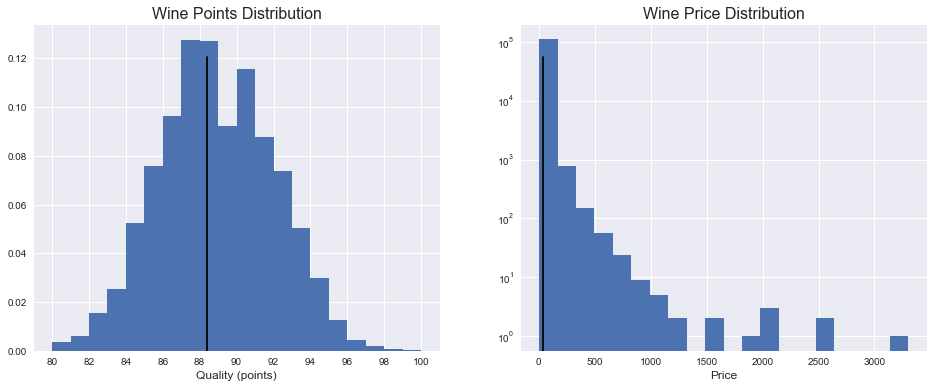

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(df.points, bins=20, normed=True)
ax1.set_xlabel('Quality (points)', size=12)
ax1.set_xticks(np.arange(min(df.points), max(df.points)+1, 2.0))
ax1.set_title('Wine Points Distribution', size=16)
ax1.axvline(np.mean(df.points), 0, .9, color='black')

ax2.hist(df.price, bins=20, log=True)
ax2.set_xlabel('Price', size=12)
ax2.set_title('Wine Price Distribution', size=16)
ax2.axvline(np.mean(df.price), 0, .9, color='black')

plt.show()

The points follow a fairly normal distribution while the price is skewed to the left.

## Statistics

The top 5 wine producing countries in the world include the United States, and a series of European nations which includes France, Italy, Spain, and Portugal.

The United states outnumbers the second place country by far. If we add the next four countries, we still do not get to the amount of wine that the US produces, but it's a closer comparison.

Here, I'm wondering if there's a significant difference in quality between wines from the US and European wines from these four countries combined. Let's test that hypotheses.

### Add continent column and limit dataset to US and Europe

In [43]:
europe = ['France', 'Italy', 'Spain', 'Portugal']
us = ['US']

country_to_continent_map = {}
for i in df.country:
    if i in europe:
        country_to_continent_map[i] = 'Europe'
    elif i in us:
        country_to_continent_map[i] = 'USA'
    else:
        country_to_continent_map[i] = ''
df['continent'] = df.country.map(country_to_continent_map)
df_us_eu = df[(df.continent == 'USA') | (df.continent == 'Europe')]
df_us_eu

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,continent
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europe
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,USA
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,USA
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,USA
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europe
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,Europe
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,Europe
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Europe
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,USA
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,Europe


Let's plot the top viretals in these five countries only including the variety in the top 200 and removing blends

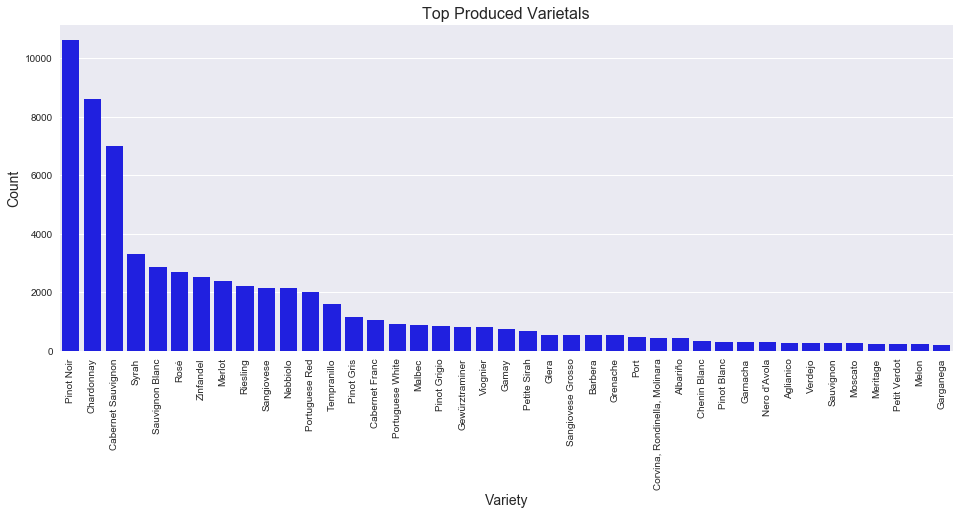

In [44]:
# Drop Varietals that are blends
df_us_eu = df_us_eu[(df_us_eu['variety'].str.contains('blend') == False) & (df_us_eu['variety'].str.contains('Blend') == False)]

temp = df_us_eu.groupby('variety', as_index=False)['continent'].count().sort_values(by='continent', ascending=False)
temp = temp[temp.continent > 200]

fig = plt.figure(figsize=(16, 6))

sns.barplot(x = 'variety', y = 'continent', data=temp, color='blue')

plt.xlabel('Variety', size=14)
plt.xticks(rotation=90)
plt.ylabel('Count', size=14)
plt.title('Top Produced Varietals', size=16)
plt.show()

### Is there a significant difference in the quality of wines from the US vs. wines from Europe?

$H_{O}$: There is no difference between the quality of wines from the U.S vs. wines from Europe.

$H_{A}$: There is a significant difference in quality between wines from the U.S. vs. wines from Europe.

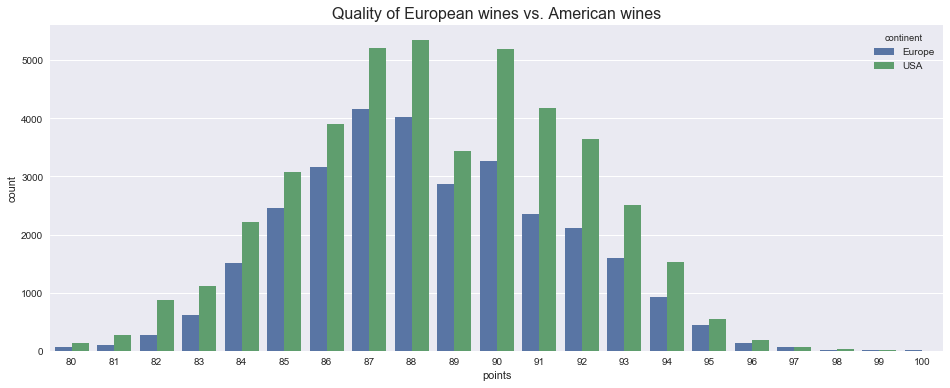

In [45]:
fig = plt.figure(figsize=(16, 6))

sns.countplot(x = 'points', hue='continent', data = df_us_eu)
plt.title('Quality of European wines vs. American wines', size=16)
plt.show()

Based on the graph above, wines from the USA have higher quality than the wines from Europe. Let's compute t-score and p-values to confirm

In [46]:
temp_us = df_us_eu[df_us_eu['continent'] == 'USA']
temp_eu = df_us_eu[df_us_eu['continent'] == 'Europe']

In [47]:
# Average quality scores
us_mean, eu_mean = np.mean(temp_us.points), np.mean(temp_eu.points)
print('Avg. quality score for U.S. wines:', us_mean)
print('Avg. quality score for European wines:', eu_mean)
print()
print('Avg. price for U.S wines: {:2.2f}'.format(np.mean(temp_us.price)))
print('Avg. price for European wines: {:2.2f}'.format(np.mean(temp_eu.price)))
print()

# Difference of means
diff_of_means = us_mean - eu_mean
print('The difference in means is:', diff_of_means)
print()

# t-score and p-value
t, p = stats.ttest_ind(temp_us.points, temp_eu.points)
print('t-score:', t)
print('p-value:', p)
print()

# Standard Error
SE = np.sqrt(np.std(temp_us.points)**2 / len(temp_us.points) + np.std(temp_eu.points)**2 / len(temp_eu.points))

merror = 1.96 * SE
print('Margin of error:', merror)
print()

# Confidence Interval
conf_int_95 = [diff_of_means - merror, diff_of_means + merror]
print('95% confidence interval:', conf_int_95)
print()

Avg. quality score for U.S. wines: 88.55765208797776
Avg. quality score for European wines: 88.45965632553057

Avg. price for U.S wines: 36.22
Avg. price for European wines: 36.93

The difference in means is: 0.09799576244718367

t-score: 4.199702361400734
p-value: 2.6757954762831897e-05

Margin of error: 0.04535010285664067

95% confidence interval: [0.052645659590542994, 0.14334586530382434]



As we can see from the graph and the low p-value, we can reject the null hypothesis that US and European wines have the same quality on average. American wines have higher quality wines. Coincidently, US wines are cheaper on average.

In [48]:
average = df_us_eu.groupby('variety', as_index=False).aggregate({'points': 'mean',
                                                          'price': 'mean',
                                                          'country': 'count'}).sort_values(by='country', ascending=False)
average = average.reset_index()
average = average[['variety', 'points', 'price', 'country']] # Keep only required columns
average.columns = ['variety', 'points', 'price', 'count']    # Rename columns
average = average[average['count'] >= 200]
average.head(10)

,variety,points,price,count
0,Pinot Noir,89.642103,49.995288,10612
1,Chardonnay,88.601206,37.128987,8621
2,Cabernet Sauvignon,89.009408,54.440485,7015
3,Syrah,89.435528,39.869853,3327
4,Sauvignon Blanc,87.619481,21.989488,2854
5,Rosé,86.867483,18.723088,2694
6,Zinfandel,87.790310,29.433678,2518
7,Merlot,87.420744,31.661648,2391
8,Riesling,88.688123,22.953762,2206
9,Sangiovese,88.615777,45.519722,2155


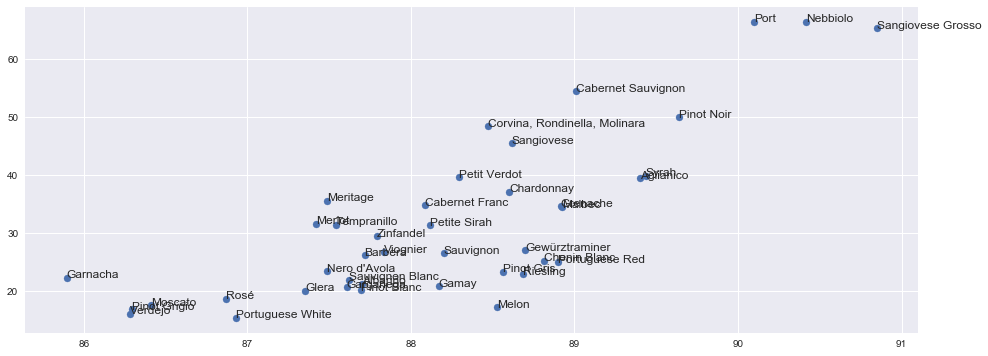

In [49]:
fig, ax = plt.subplots(figsize=(16,6))

ax.scatter(average.points, average.price)
for i, txt in enumerate(average.variety):
    ax.annotate(txt, (average.points[i], average.price[i]))    
    
plt.show()
plt.clf()

# Machine Learning

In this section, we're going to use the description field from the dataset to predict the variety (labels) of the wine.

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import spacy
import nltk
import re

# varieties = ['Zinfandel', 'Chardonnay', 'Syrah', 'Riesling', 'Malbec', 'Merlot', 'Rosé', 'Sauvignon Blanc', 'Cabernet Sauvignon', 'Pinot Gris']
# df_test = df[df['variety'].isin(varieties)]

print(len(df_us_eu))
df = df_us_eu.groupby('variety').filter(lambda x: len(x) > 200)
print(len(df))
df.variety.unique()

73714
64761


Get the dataset I'm going to work with and inspect it

In [66]:
# Get the X
corpus = df['description']
vect = CountVectorizer()
X = vect.fit_transform(corpus).tocsc()

# Get the y
y = df['variety']

# Look at the different words you'll working with
feature_names = vect.get_feature_names()

print('Count of feature names:', len(feature_names))
print()
print('First 50 features:\n{}'.format(feature_names[:527]))
print()
print('First 2000 to 2030 features:\n{}'.format(feature_names[2000:2030]))
print()
print('Every 400th feature:\n{}.'.format(feature_names[::400]))

Count of feature names: 22865

First 50 features:
['000', '008', '01', '02', '03', '030', '04', '05', '056', '05s', '06', '061', '064', '06s', '07', '07s', '08', '09', '093', '09s', '10', '100', '100g', '100ml', '100th', '101', '103', '105', '106', '107th', '108', '10g', '10th', '11', '110', '111', '114', '115', '116', '11th', '12', '120', '1200', '122', '123', '125', '126', '128', '1290', '12g', '12th', '13', '130', '130th', '132', '134', '135', '136', '1375', '1396', '13g', '13th', '14', '140', '1429', '146', '147', '1492', '14g', '14th', '15', '150', '1500', '1500s', '150th', '152', '154', '155g', '159g', '15g', '15s', '15th', '16', '160', '1600', '1607', '160g', '164', '165', '1667', '1690', '16g', '16th', '17', '170', '170g', '172', '1737', '1740', '1756', '1763', '177', '1772', '1787', '1789', '179', '1790', '1791', '17th', '18', '180', '1800', '1800s', '1806', '1811', '1819', '1820s', '1829', '183', '1835', '1840s', '185', '1850', '1850s', '1859', '1860s', '1864', '1865', '1868'

Steps to clean text before moving forward

In [67]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
normalized_corpus = normalize_corpus(corpus)

In [68]:
# Get the X
vect = CountVectorizer()
X = vect.fit_transform(normalized_corpus).tocsc()

# Get the y
y = df['variety']

# Look at the different words you'll working with
feature_names = vect.get_feature_names()

print('Count of feature names:', len(feature_names))
print()
print('First 50 features:\n{}'.format(feature_names[:50]))
print()
print('First 2000 to 2030 features:\n{}'.format(feature_names[2000:2030]))
print()
print('Every 400th feature:\n{}.'.format(feature_names[::400]))

Count of feature names: 30617

First 50 features:
['aand', 'aaron', 'ab', 'abacela', 'abacelas', 'abacelawas', 'abadia', 'abandon', 'abandoned', 'abate', 'abbazia', 'abbey', 'abbott', 'abbreviated', 'abc', 'abeille', 'abeja', 'abejas', 'aberrant', 'abetina', 'abeyance', 'abide', 'abilio', 'abilities', 'ability', 'abiouness', 'able', 'ably', 'abnormal', 'abnormally', 'abound', 'aboundboysenberry', 'aboundcassis', 'abounds', 'aboveaverage', 'abovethefog', 'abrasive', 'abrazo', 'abreu', 'abrigo', 'abroad', 'abrupt', 'abruptly', 'abruzzo', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absorb']

First 2000 to 2030 features:
['basmati', 'basque', 'bass', 'basses', 'bassi', 'basslike', 'bassline', 'bastide', 'bat', 'batasiolo', 'batch', 'batches', 'bath', 'bathe', 'bathed', 'bathes', 'bathing', 'bathroom', 'bathsoap', 'batinage', 'batonnage', 'batrice', 'battalion', 'battalions', 'batten', 'battened', 'battens', 'batter', 'batting', 'battle']

Every 400th feature:
['aand', 'ageth

Check how different models work on the data without adjusting parameters

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
# Naive Bayes
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
print('Naïve Bayes')
print('Mean cross-validation accuracy: {:.2f}'.format(np.mean(scores)))
print()
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print('Logistic Regression')
print('Mean cross-validation accuracy: {:.2f}'.format(np.mean(scores)))

Naïve Bayes
Mean cross-validation accuracy: 0.56

Logistic Regression
Mean cross-validation accuracy: 0.70


Run GridSearch CV to find the best hyperparameters for each model:
* "Alpha" for MultinomialNB
* "C" for Logistic Regression

In [70]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print('Best cross-validation score(Naïve Bayes): {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)
print()
param_grid = {'C': [00.1, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print('Best cross-validation score (LogReg): {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)

Best cross-validation score(Naïve Bayes): 0.62
Best parameters:  {'alpha': 0.1}

Best cross-validation score (LogReg): 0.70
Best parameters:  {'C': 1}


Since Logistic Regression gave us the best results. Let's run it again but with TfidfVectorizer instead of CountVectorizer

In [71]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english'), 
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(normalized_corpus, y)
print('Best cross-validation score(LogReg with TFIDF): {:.2f}'.format(grid.best_score_))
print('Best parameters: ',grid.best_params_)

Best cross-validation score(LogReg with TFIDF): 0.71
Best parameters:  {'logisticregression__C': 10}


Find the features with the lowest tfidf and the highest tfidf:

In [73]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(normalized_corpus)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print('Features with lowest tfidf:\n{}'.format(feature_names[sorted_by_tfidf[:20]]))
print()
print('Features with highest tfidf: \n{}'.format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['larded' 'similarlynamed' 'deaf' 'zestinessthere' 'sobering'
 'perceptions' 'selfgenerating' 'lightincisive' 'sleeping' 'developer'
 'services' 'wilkinson' 'raytheon' 'unflinching' 'hoard' 'colutta'
 'monsoonlike' 'wagon' 'midharvest' 'cajoles']

Features with highest tfidf: 
['minimum' 'permit' 'peachladen' 'dull' 'overshadows' 'herbinflected'
 'ale' 'lees' 'strawberryfruit' 'strawberrypinkcolored' 'earlydrinking'
 'shiraz' 'unfocused' 'greeninflected' 'review' 'intangible' 'diluted'
 'everday' 'ros' 'candypinkcolored']


Let's add another element in the form of N_Grams

In [74]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(normalized_corpus, y)
print('Best cross-validation score (LogReg with TF): {:.2f}'.format(grid.best_score_))
print('Best parameters:\n{}'.format(grid.best_params_))

Best cross-validation score (LogReg with TF): 0.72
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 2)}
